<a href="https://colab.research.google.com/github/Samenergy/Databases_P13/blob/main/laptop_price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the dataset
data = pd.read_csv('laptop_prices.csv')
data.head()


,Brand,Processor,RAM_GB,Storage,GPU,Screen_Size_inch,Resolution,Battery_Life_Hours,Weight_Kg,Operating_System,Price_Dollars
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [3]:
# Encode categorical columns
categorical_columns = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating_System']
encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Feature scaling for numerical columns
scaler = StandardScaler()
numerical_columns = ['RAM_GB']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the preprocessed data
data.head()


,Brand,Processor,RAM_GB,Storage,GPU,Screen_Size_inch,Resolution,Battery_Life_Hours,Weight_Kg,Operating_System,Price_Dollars
0,1,0,1.798907,4,3,17.3,2,8.9,1.42,0,3997.07
1,8,2,-0.958237,1,6,14.0,0,9.4,2.57,1,1355.78
2,2,5,0.328430,3,5,13.3,3,8.5,1.74,0,2673.07
3,5,5,-0.958237,2,6,13.3,0,10.5,3.10,2,751.17
4,8,4,-0.958237,2,0,16.0,3,5.7,3.38,1,2059.83


In [4]:
# Define features and target variable
X = data.drop(columns=['Price_Dollars'])
y = data['Price_Dollars']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)


In [6]:
# Train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)


In [7]:
# Train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)


In [8]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")


Linear Regression - MAE: 607.3607950553894, MSE: 696667.1372459471, RMSE: 834.6658836001069, R²: 0.6068642443186594


In [9]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}")


Decision Tree Regressor - MAE: 393.48730246389124, MSE: 375690.9722224724, RMSE: 612.9363525052764, R²: 0.7879940844472516


In [10]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")


Random Forest Regressor - MAE: 306.3301839847068, MSE: 201743.49807420286, RMSE: 449.15865579347667, R²: 0.8861542645993954


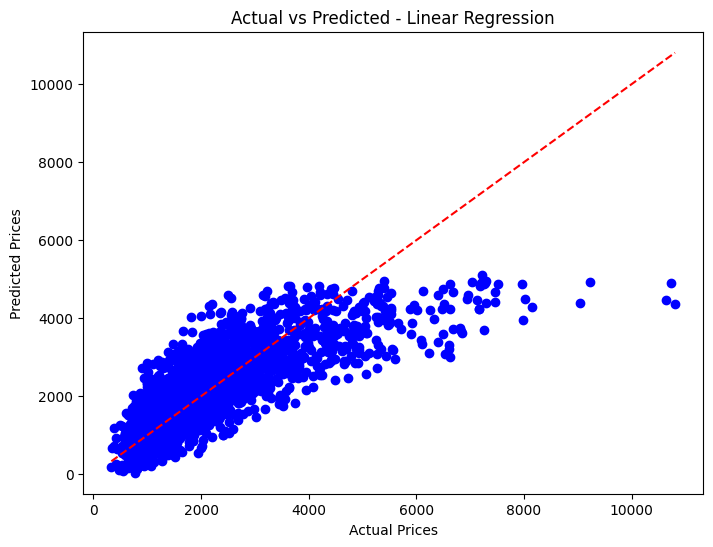

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted - Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


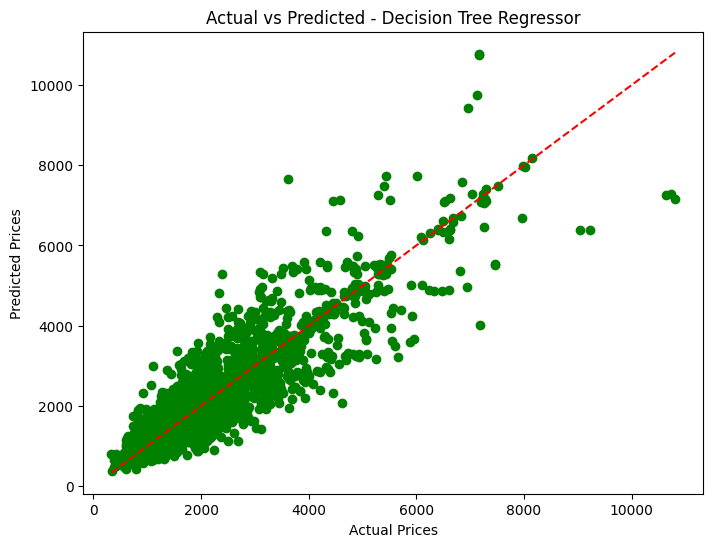

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted - Decision Tree Regressor')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


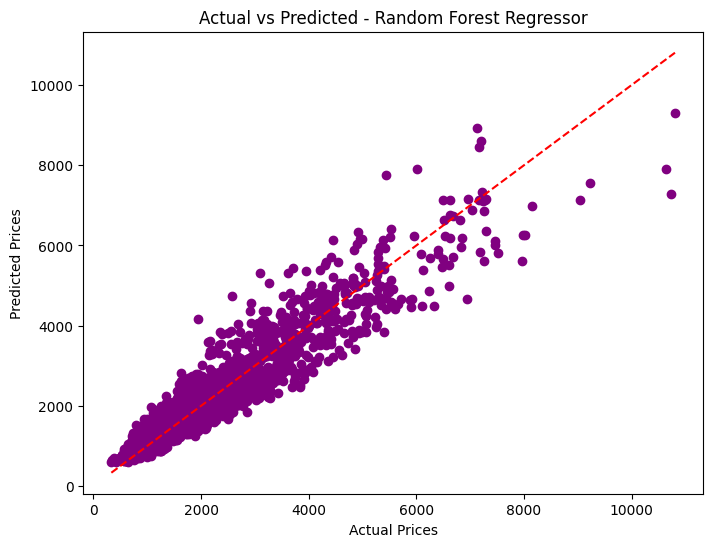

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted - Random Forest Regressor')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [14]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)


In [22]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data (assuming the CSV file is already loaded)
data = pd.read_csv('laptop_prices.csv')

# Encode categorical columns
categorical_columns = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating_System']
encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Feature scaling for numerical columns
scaler = StandardScaler()
numerical_columns = ['RAM_GB', 'Screen_Size_inch', 'Battery_Life_Hours', 'Weight_Kg']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define features and target variable
X = data.drop(columns=['Price_Dollars'])
y = data['Price_Dollars']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

# Save the encoder, scaler, and model as .pkl files
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Models and preprocessors saved successfully.")


Random Forest Regressor - MAE: 306.2439017417162, MSE: 201608.83228217319, RMSE: 449.0087218330766, R²: 0.8862302577603808
Models and preprocessors saved successfully.


In [ ]:
import pickle
import pandas as pd
import numpy as np

# Load the saved encoder, scaler, and model
with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Example input data (new laptop data)
new_data = {
    'Brand': ['Apple'],
    'Processor': ['AMD Ryzen 3'],
    'RAM_GB': [64],
    'Storage': ['512GB SSD'],
    'GPU': ['Nvidia GTX 1650'],
    'Screen_Size_inch': [17.3],
    'Resolution': ['2560x1440'],
    'Battery_Life_Hours': [8.9],
    'Weight_Kg': [1.42],
    'Operating_System': ['FreeDOS']
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame(new_data)

# Encode categorical columns using the loaded encoder
categorical_columns = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating_System']
for col in categorical_columns:
    input_df[col] = encoder.transform(input_df[col])

# Scale the numerical features using the loaded scaler
numerical_columns = ['RAM_GB', 'Screen_Size_inch', 'Battery_Life_Hours', 'Weight_Kg']
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

# Predict the price using the loaded model
predicted_price = rf_model.predict(input_df)

print(f"Predicted Price: ${predicted_price[0]:.2f}")


Predicted Price: $1535.92
